In [1]:
import networkx as nx

import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [2]:
G = nx.Graph()

G.add_edges_from([
    (0, 1), (0, 3), (0, 4), 
    (1, 2), (1, 4), (1, 5), (1, 7),
    (2, 4), (2, 5), (2, 6),
    (3, 5), (3, 6), (3, 8),
    (4, 5), (4, 6), (4, 7), (4, 8),
    (5, 7), (5, 8), (5, 9),
    (6, 7), (6, 9),
    (7, 8), (7, 9),
    (8, 9),
    
    (10, 4), (17, 9),
    (10, 11), (10, 12), (10, 13), (10, 14), (10, 15),
    (11, 12), (11, 14), (11, 16), 
    (12, 14), (12, 16), (12, 18),
    (13, 14), (13, 15),
    (14, 15), (14, 18), (14, 19),
    (15, 16), (15, 17), (15, 18),
    (16, 18), (16, 19),
    (17, 18),
    (18, 19)
    
])

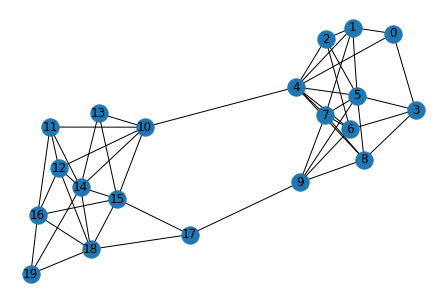

In [3]:
nx.draw(G, with_labels=True)

In [4]:
# Creating the adjaceny matrix
G_adj = nx.adjacency_matrix(G)

degrees = [deg for _, deg in list(G.degree())]
# Creating the degree matrix
G_degree_matrix = np.diag(degrees)

# Computing the laplacian matrix L
G_laplacian = G_degree_matrix - G_adj.todense()

# Computing the eigen_values and the corresponding eigen_vectors.
G_eig_vals, G_eig_vecs = np.linalg.eig(G_laplacian)

# Sorting the eigen values and the corresponding eigen vectors
# in ascending order.
eig_args = np.argsort(G_eig_vals)
G_eig_vals = G_eig_vals[eig_args]
G_eig_vecs = G_eig_vecs[:, eig_args]


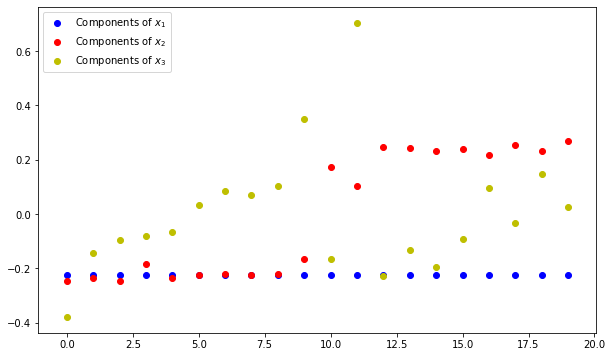

In [5]:
plt.figure(figsize=(10, 6))

# Plotting the first 3 components of eigen vectors.
plt.scatter(range(len(G.nodes)), np.array(G_eig_vecs[:, 0]).squeeze(), c='b', label='Components of $x_1$');
plt.scatter(range(len(G.nodes)), np.array(G_eig_vecs[:, 1]).squeeze(), c='r', label="Components of $x_2$");
plt.scatter(range(len(G.nodes)), np.array(G_eig_vecs[:, 2]).squeeze(), c='y', label="Components of $x_3$");
plt.legend(loc="upper left")
plt.show()

In [6]:
# Clustering the nodes based on first three (skipping the first one)
# eigenvectors.
feature_vecs = G_eig_vecs[:, 1:4]

k_means = KMeans(n_clusters=2)
k_means.fit(feature_vecs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
labels_ = k_means.labels_

In [8]:
# KMeans clusters the nodes perfectly well in this case.
labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
# We can also use the second eigenvector to determine the 
# clusters based on sign.
node_list_1 = np.argwhere(np.sign(np.array(G_eig_vecs)[:, 1]) == -1).squeeze()
node_list_2 = np.argwhere(np.sign(np.array(G_eig_vecs)[:, 1]) == 1).squeeze()

In [10]:
node_list_1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [11]:
node_list_2

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int64)

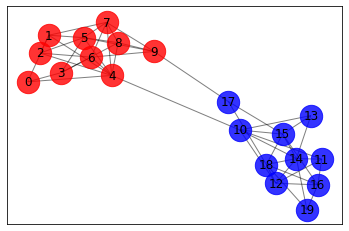

In [12]:
pos = nx.spring_layout(G)  # positions for all nodes
options = {"node_size": 500, "alpha": 0.8}

nx.draw_networkx_nodes(G, pos, nodelist=node_list_1, node_color="r", **options)
nx.draw_networkx_nodes(G, pos, nodelist=node_list_2, node_color="b", **options)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos)

plt.show()